#### Problem Statement
A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

- They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

- The company wants to know the following things:

1. Which variables are significant in predicting the price of a car?
2. How well do those variables describe the price of a car?

#### Buidling a multiple linear regression model on the data to address the above concerns

#### Domain Analysis

##### Understanding the data

##### 1. Car_ID: Unique id of each observation 		
##### 2. Symboling : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.	
##### 3. carName: Name of car company  ( that comprises two parts: the first word is the name of the car company, and the second is the car model)		
##### 4. fueltype	: Car fuel type i.e gas or diesel 	
##### 5. aspiration	: Aspiration used in a car 		
##### 6. doornumber	: Number of doors in a car 		
##### 7. carbody : body of car 		
##### 8. drivewheel	: type of drive wheel 		
##### 9. enginelocation	: Location of car engine 		
##### 10. wheelbase: Weelbase of car 		
##### 11. carlength	: Length of car 		
##### 12. carwidth	: Width of car 		
##### 13. carheight	: height of car 		
##### 14. curbweight : The weight of a car without occupants or baggage. 	
#####  15. enginetype : Type of engine. 		
#####  16. cylindernumber : cylinder placed in the car 		
##### 17. enginesize : Size of car 		
#####  18. fuelsystem : Fuel system of car 		
##### 19. boreratio : Boreratio of car 		
#####  20. stroke: Stroke or volume inside the engine 
##### 21. compressionratio : compression ratio of car 
#####  22.horsepower : Horsepower 	
#####  23. peakrpm	: car peak rpm 		
##### 24.citympg : Mileage in city 		
#####  25 . highwaympg	: Mileage on highway 	
#####  26. price(Dependent variable): Price of car 	


- The target column here is Price - Trying to predict the car

In [97]:
# load the libaries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [99]:
# load the data
data = pd.read_csv('C:/Users/DELL/Downloads/CarPrice_Assignment.csv')

In [101]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### Basic understanding of the entire data and performing the basic cleaning for the data

In [103]:
data.shape
# the data has  205 rows and 26 columns

(205, 26)

In [105]:
data.columns
# all the columns are in the readable format no renaming is required

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [107]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [109]:
# there are categorical data, which requires encoding

In [111]:
# Extract CarName  and CarModel from CarName column
data['CarName'] = data['CarName'].apply(lambda x: x.split(' ')[0])
data['CarModel'] = data['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [113]:
# consider only the company name as the independent variable for model building
data.drop(columns=['CarModel'],axis=1,inplace=True)

In [115]:
# printing all the categorical data, to understand the data unique values in each columns
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [117]:
# Clean-up suggestions:
# CarName: Correct inconsistencies (e.g., 'toyota' vs. 'toyouta', 'volkswagen' vs. 'vokswagen', 'nissan' vs. 'Nissan').
# to avoid duplications in the data
corrections = {
    'toyouta': 'toyota',
    'Nissan': 'nissan',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}
# Clean up the CarName column by replacing incorrect names with the correct ones
data['CarName'] = data['CarName'].replace(corrections)

# Convert all CarName entries to lowercase to handle capitalization inconsistencies
data['CarName'] = data['CarName'].str.lower()

In [119]:
for i in cat_col:
    print(data[i].value_counts())
    print('------------------')
    

CarName
toyota         32
nissan         18
mazda          15
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
maxda           2
renault         2
mercury         1
porcshce        1
Name: count, dtype: int64
------------------
fueltype
gas       185
diesel     20
Name: count, dtype: int64
------------------
aspiration
std      168
turbo     37
Name: count, dtype: int64
------------------
doornumber
four    115
two      90
Name: count, dtype: int64
------------------
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
------------------
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
------------------
enginelocation
front    202
rear       

- Some insights:
1. doornumber and  cylindernumber These two variables are ordinal because they involve quantities that have a meaningful order.
2. As the data required inconsistency handling performed the same on the data

In [122]:
# as car_ID is very unique to each value dropping the columns before going for further analysis
data.drop(columns=['car_ID'],axis=1,inplace=True)

In [124]:
num_col = data.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [126]:
# Check the number of unique values of each column
num_col.nunique()

symboling             6
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginesize           44
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [128]:
# here on seeing the unique values , symboling seems to be descrete data

In [130]:
data['symboling'].unique()
# Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe 		

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [134]:
# there is no null values in the data and the memory usage of the data is about 40KB

In [136]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [138]:
# one insight here is no constant columns as all the columns show some deviation.

In [140]:
data.describe(include='O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,24,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,115,96,120,202,148,159,94


In [142]:
# no null column and no constant column as all the columns have unique value more than 1

In [144]:
pd.set_option('display.max_columns',None)

In [146]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- The data after handling the inconsistency of CarName column, dropping the Car_Id which has no importance further 

### EDA on the data

- Univariate analysis on the data

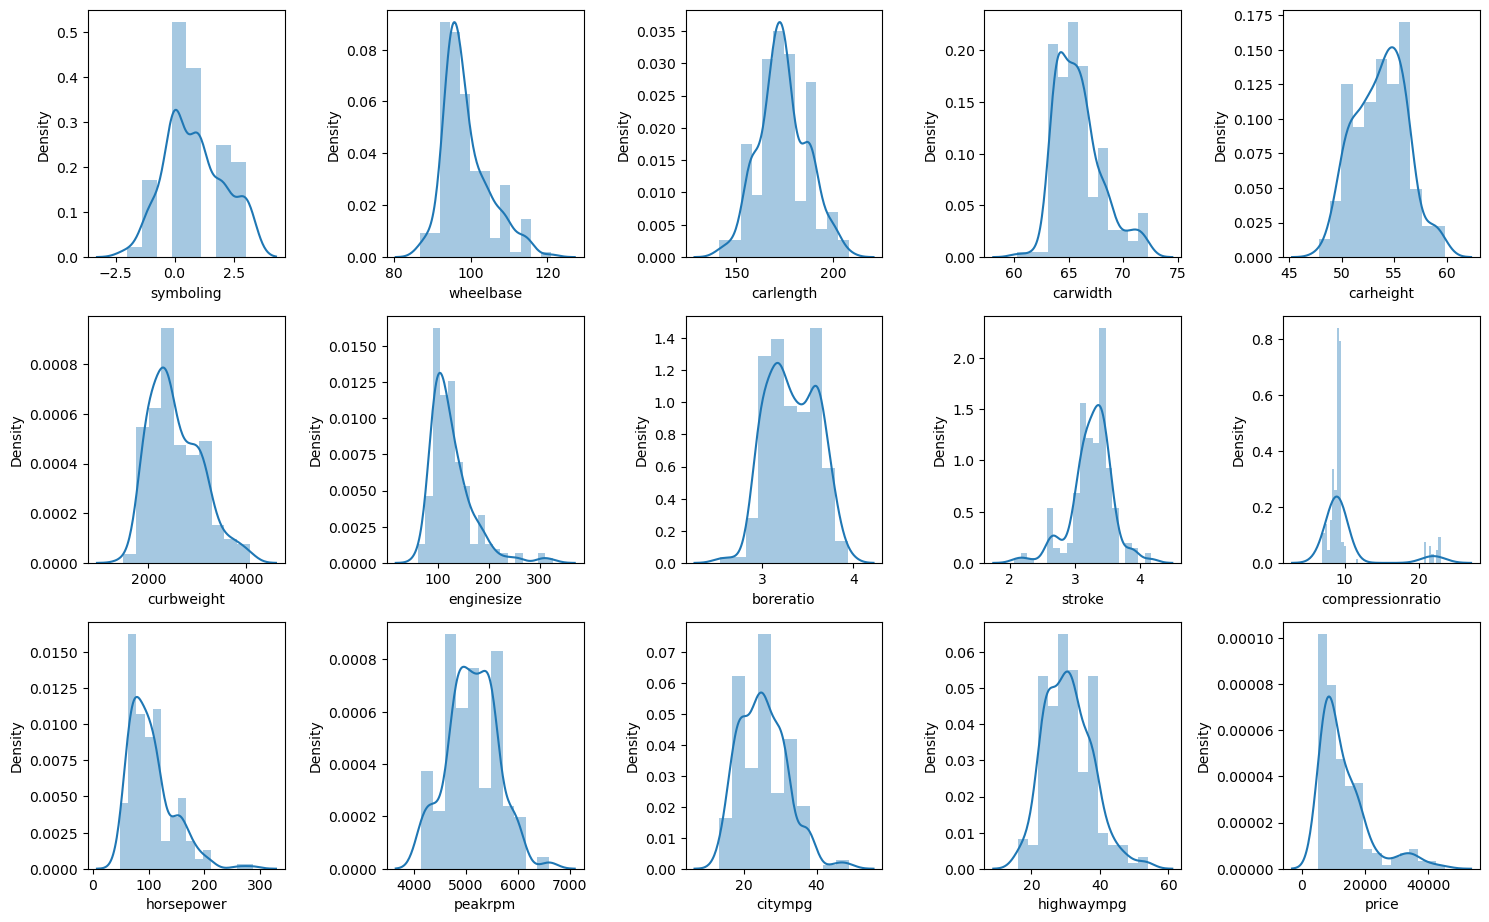

In [36]:
#SUBPLOT
plt.figure(figsize=(15,15))
plotnumber = 1

for i in num_col:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()
    

#### Insights:

1. Price, horsepower, enginesize , compressionratio , wheelbase show right skewness in the data
2. Rest all columns show not normal distibution

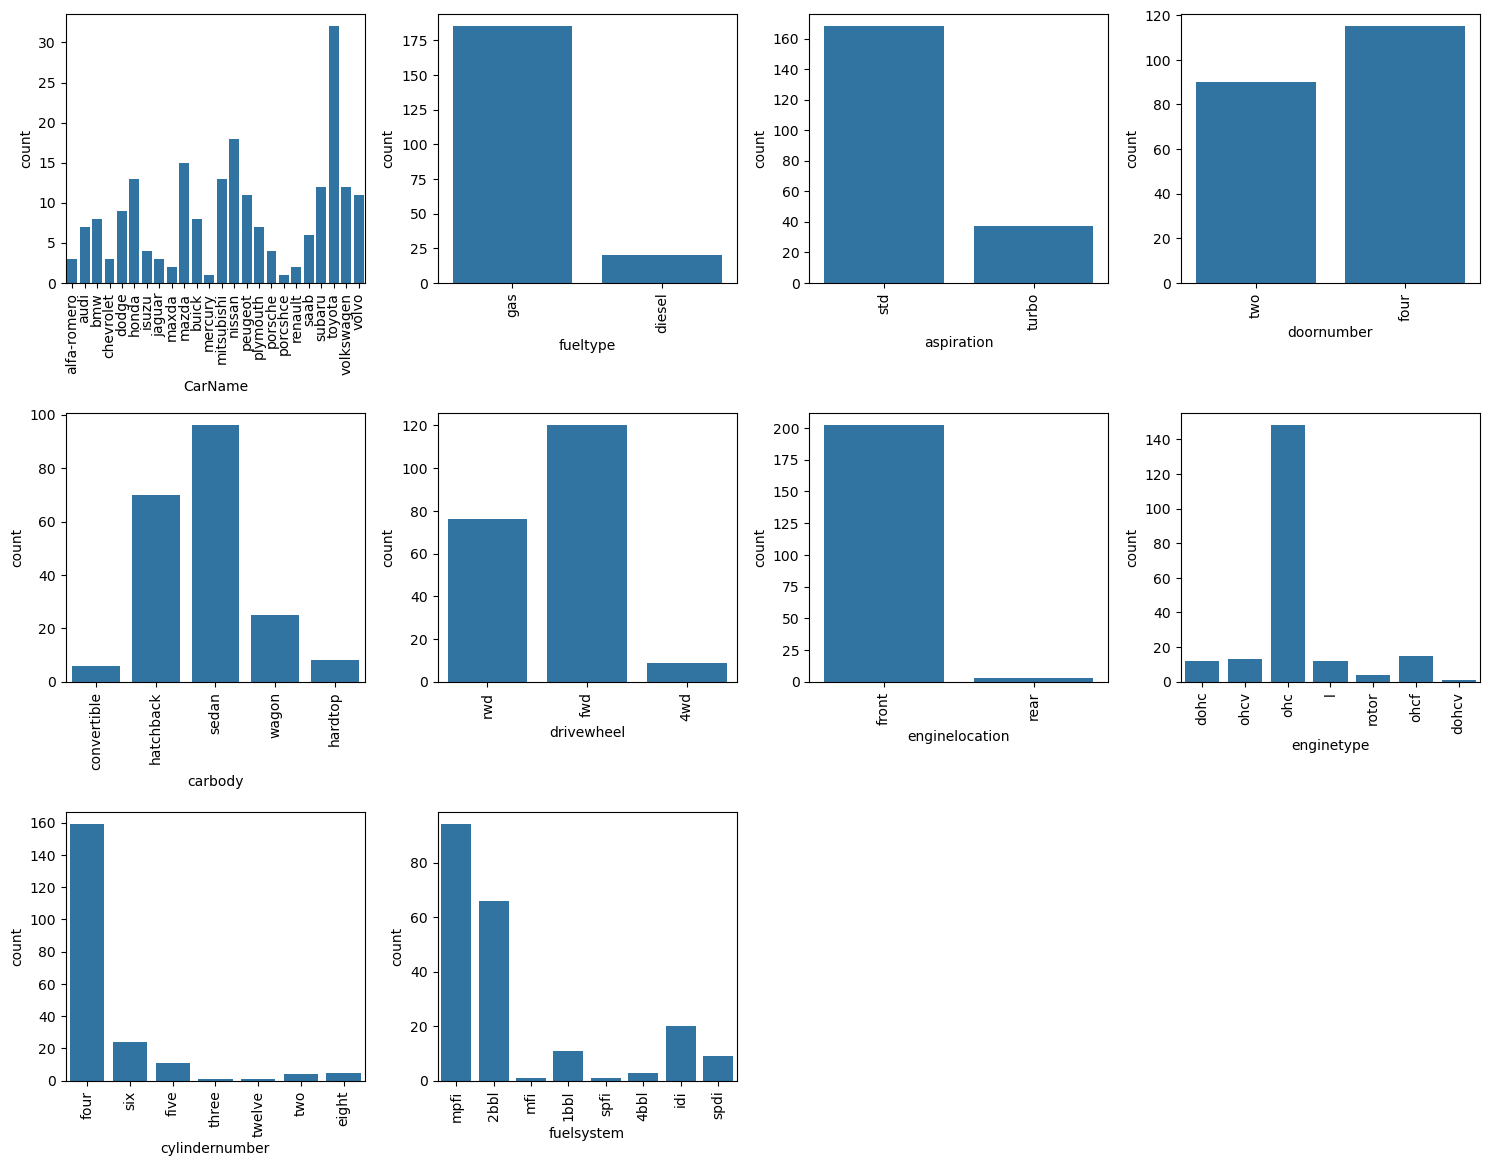

In [38]:
#SUBPLOT
plt.figure(figsize=(15,15))
plotnumber = 1

for i in cat_col:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data[i])
        plt.xlabel(i,fontsize=10)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.tight_layout()
    

#### Insights 

1. There are many cars owned by the brand TOYOTA
2. There are many cars which is having the fuel type gas
3. There are many cars which is having the aspiration std i.e STANDARD
4. There are many cars which is having 4 doors
5. There are many cars which is having the body style as SEDAN
6. There are many cars which is having drive wheel type as FWD - Front wheel powered ((better fuel efficiency, good traction on slippery roads).
7. There are many cars which is having enginelocation as front
8. There are many cars which is having engine type as L
 
          [ OHC, OHCF, OHCV: Overhead camshaft configurations, with variations for Ford (OHCF) and V-shaped engines (OHCV).
            DOHC, DOHCV: Dual overhead camshafts for improved performance, with DOHCV for V-shaped engines.
            L: Inline engine, simple and commonly used.
            Rotor: Rotary engine, compact and unique, used in Mazda's RX-series.]
9. There are many cars which is having cyclinder number to be 4
10. There are many cards which is having fuelsystem as mpfi
    
              [ MPFI is the most advanced and efficient of the listed systems.
                2BBL, 1BBL, and 4BBL refer to carburetor-based systems, which are less efficient and largely outdated.
                SPDI and SPFI are early forms of fuel injection systems.
                IDI is mainly for older diesel engines.]

####  Bivariate analysis on the data

##### Analysing all the categorical values against the target Price

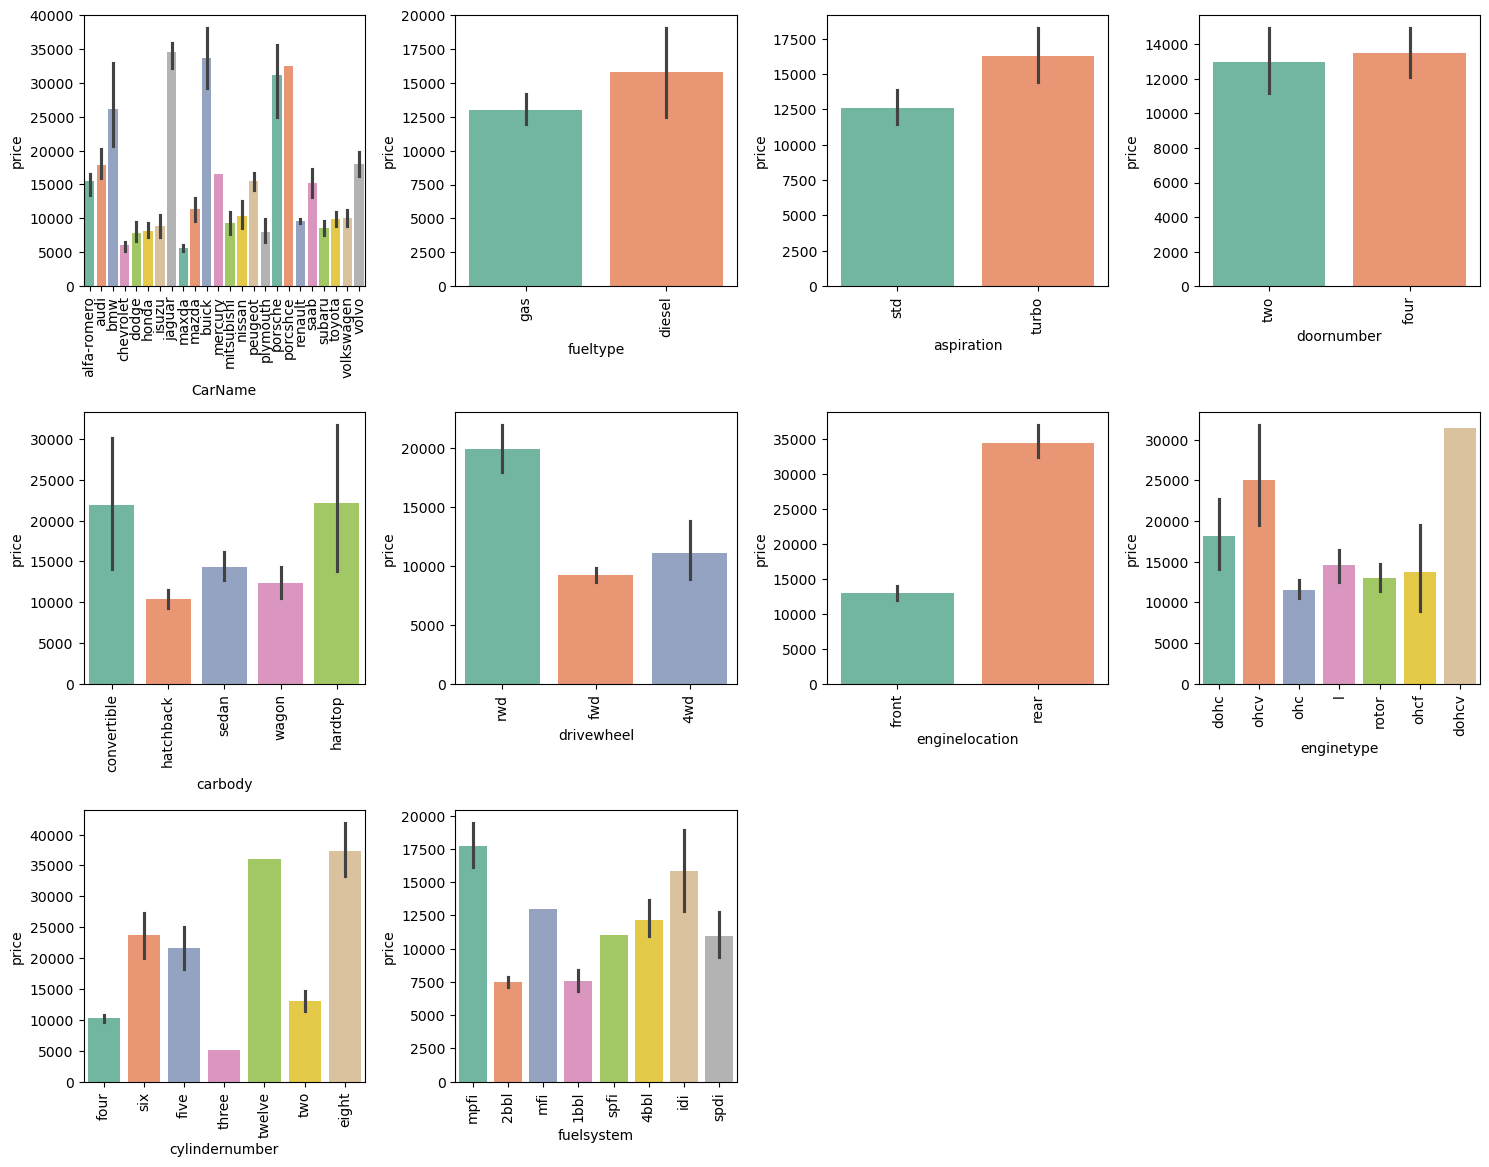

In [41]:
#SUBPLOT
plt.figure(figsize=(15,15))
plotnumber = 1

for i in cat_col:
    if plotnumber <= 15:
        ax = plt.subplot(4,4,plotnumber)
        sns.barplot(x=data[i],y=data['price'],palette = "Set2" )
        plt.xlabel(i,fontsize=10)
        plt.xticks(rotation=90)
    plotnumber +=1
plt.tight_layout()
    

##### Insights:

1. The Jaguar is the highest priced CarModel.
2. The fuel type 'diesel' is highest priced.
3. The aspiration with turbocharged is priced high
4. The doornumber having 4 priced little high
5. The carbody type with 'hardtop' and 'convertible' is priced high
6. The drivewheel type 'rwd' is priced high
7. The engine location with 'rear' type is priced high
8. The engine type with enginetype 'dohcv' is priced high
9. The car with 8 cylinder is priced high
10. The car with fuel system 'mpfi' is high in price


##### Analysing numerical columns with target price

In [63]:
num_col.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

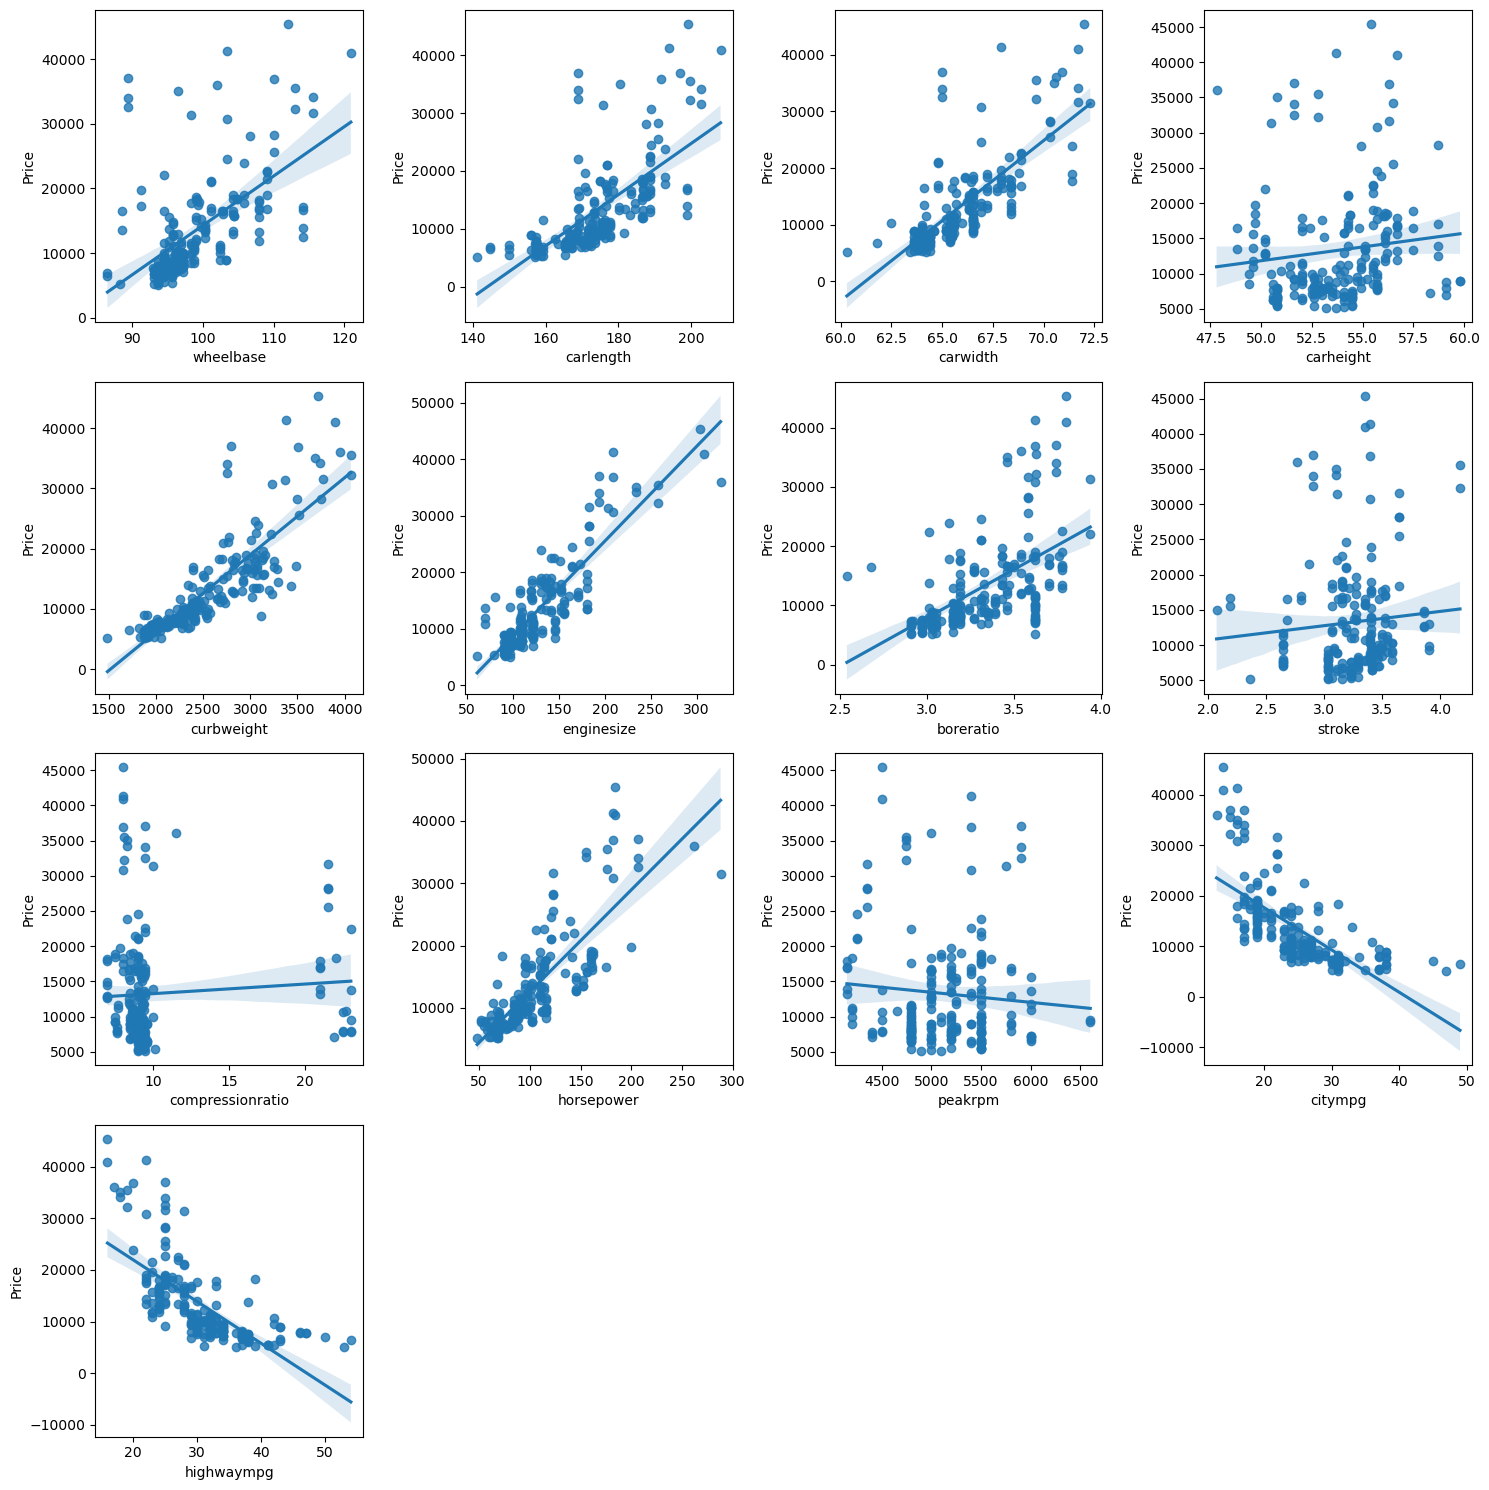

In [69]:
plt.figure(figsize=(15, 15))
plotnumber = 1

for i in data[['wheelbase', 'carlength', 'carwidth', 'carheight',
          'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
          'horsepower', 'peakrpm', 'citympg', 'highwaympg']]:
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.regplot(x=data[i], y=data['price'])
        plt.xlabel(i, fontsize=10)
        plt.ylabel('Price', fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Insights


1. Wheelbase vs Price: A positive linear relationship is observed, indicating that cars with a larger wheelbase tend to have higher prices.
2. Carlength vs Price: There is a clear upward trend between car length and price, showing a strong positive correlation.
3. Carwidth vs Price: A positive correlation exists between car width and price, with wider cars generally commanding higher prices.
4. ##### Carheight vs Price: The relationship between car height and price is weak, with a very slight upward trend and high variability.
5. Curbweight vs Price: A strong positive relationship is seen, indicating that heavier cars are generally more expensive.
6. Enginesize vs Price: A clear positive correlation exists, showing that cars with larger engines tend to be priced higher.
7. Boreratio vs Price: A moderate positive relationship is observed, with higher bore ratios linked to higher car prices
8. ##### Stroke vs Price: There is a weak relationship between stroke and price, with no clear linear pattern.
9. ##### Compression Ratio vs Price: There is a weak positive relationship between compression ratio and price, suggesting that it has little effect on car pricing.
10. Horsepower vs Price: A strong positive correlation exists, showing that cars with higher horsepower tend to be more expensive.
11. ##### Peak RPM vs Price: There is almost no relationship between peak RPM and price, with a very slight downward trend.
12. City MPG vs Price: A strong negative correlation exists, indicating that cars with higher city mileage (more fuel-efficient) tend to have lower prices.
13. Highway MPG vs Price: Similar to city MPG, there is a negative correlation between highway MPG and price.

#### Correlation Analysis

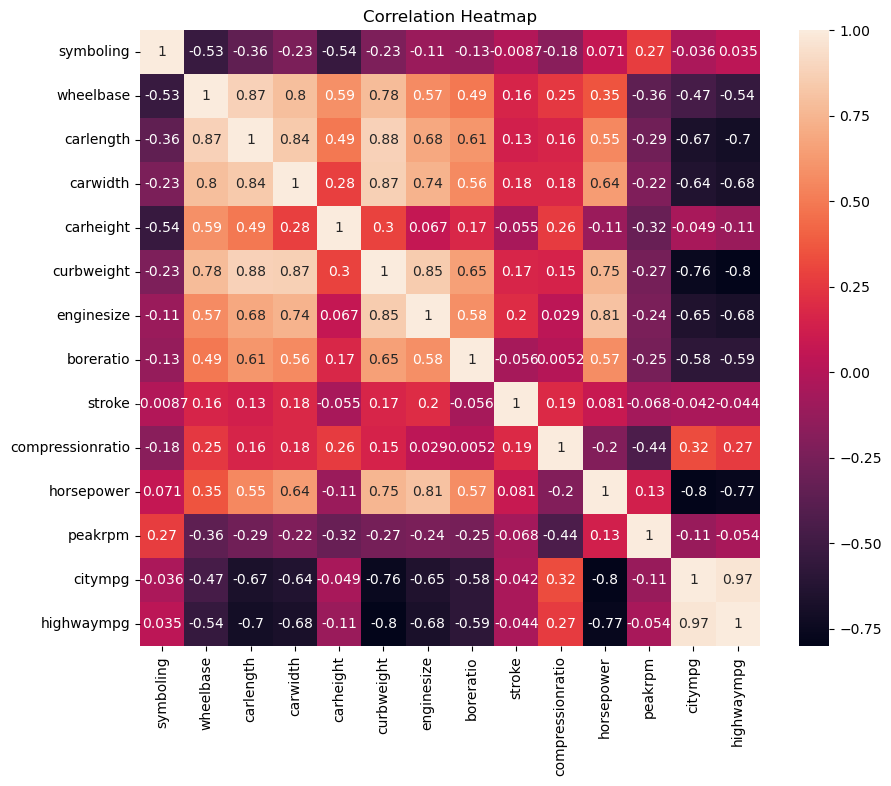

In [58]:
correlation_matrix = num_col.drop('price',axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

- There is multicollinearity existing in the data, we can either drop the columns with high correlation, apply regularization or apply VIF technique to handle this.

##### Performing pre processing on the data

In [151]:
# checking for null values
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [153]:
# there are no null values in the data

In [155]:
# checking for duplicates
data.duplicated().sum()
# there are no duplicate data

0

In [157]:
# Encoding the categorical data
cat_col.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [159]:
# doornumber and  cylindernumber as they are ordinal data applying label encoder
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()    

In [161]:
for col in ['doornumber', 'cylindernumber']:
    data[col] = lc.fit_transform(data[col])

In [163]:
# Frequency encoding is applied to rest of the columns
columns_to_encode = ['CarName', 'fueltype', 'aspiration', 'carbody', 
                     'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# Frequency encoding for each column
for col in columns_to_encode:
    # Get the frequency of each category in the column
    freq = data[col].value_counts()
    
    # Rank the categories based on their frequencies (lowest frequency gets rank 0)
    rank_mapping = freq.rank(method='dense', ascending=True).astype(int) - 1
    
    # Map the ranks to the original column values
    data[col] = data[col].map(rank_mapping)



In [165]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,1,1,0,1,1,88.6,168.8,64.1,48.8,2548,2,2,130,6,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,1,1,1,0,1,1,88.6,168.8,64.1,48.8,2548,2,2,130,6,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,1,1,1,3,1,1,94.5,171.2,65.5,52.4,2823,3,3,152,6,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,5,1,1,0,4,2,1,99.8,176.6,66.2,54.3,2337,5,2,109,6,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,1,0,4,0,1,99.4,176.6,66.4,54.3,2824,5,1,136,6,3.19,3.40,8.0,115,5500,18,22,17450.0


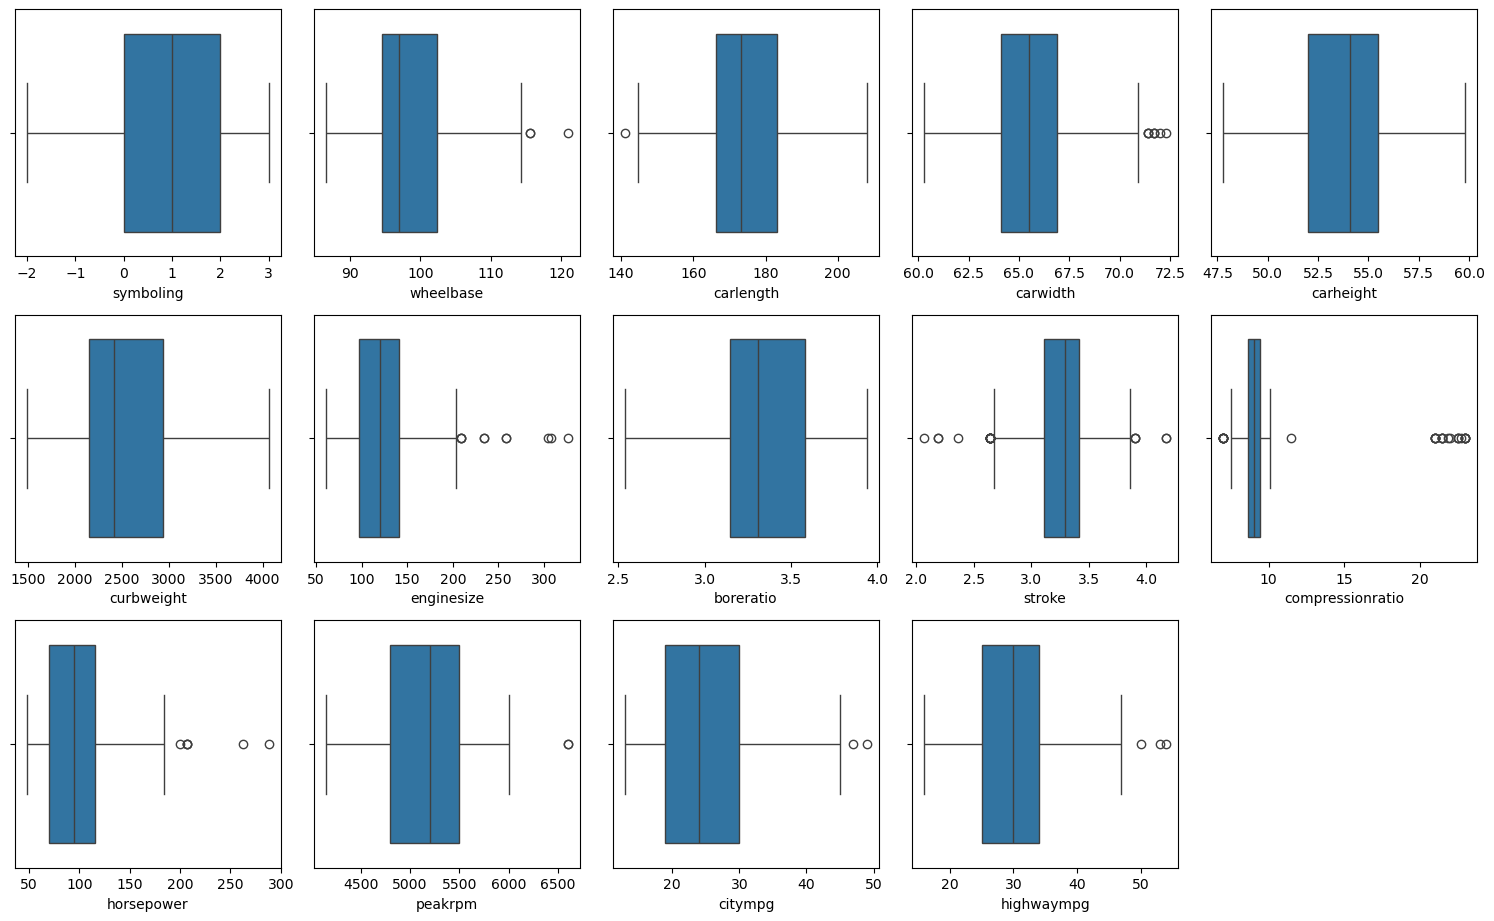

In [68]:
# checking for outliers
# checking it on numerical data


plt.figure(figsize=(15,15))
plotnumber = 1

for i in num_col.drop(columns=['price'],axis=1):
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

- The below colums wheelbase, carlength , carwidth , enginesize , stroke , compressionratio , horsepower ,peakrpm, citympg, highwaympg all have outliers 

In [74]:
data['compressionratio'].nunique()

32

In [76]:
data['compressionratio'].unique()
# not treating outlier here as considered as a descrete column and behavior is same

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [167]:
df = data[['wheelbase','carlength','carwidth','enginesize','stroke','horsepower','peakrpm','citympg','highwaympg']]

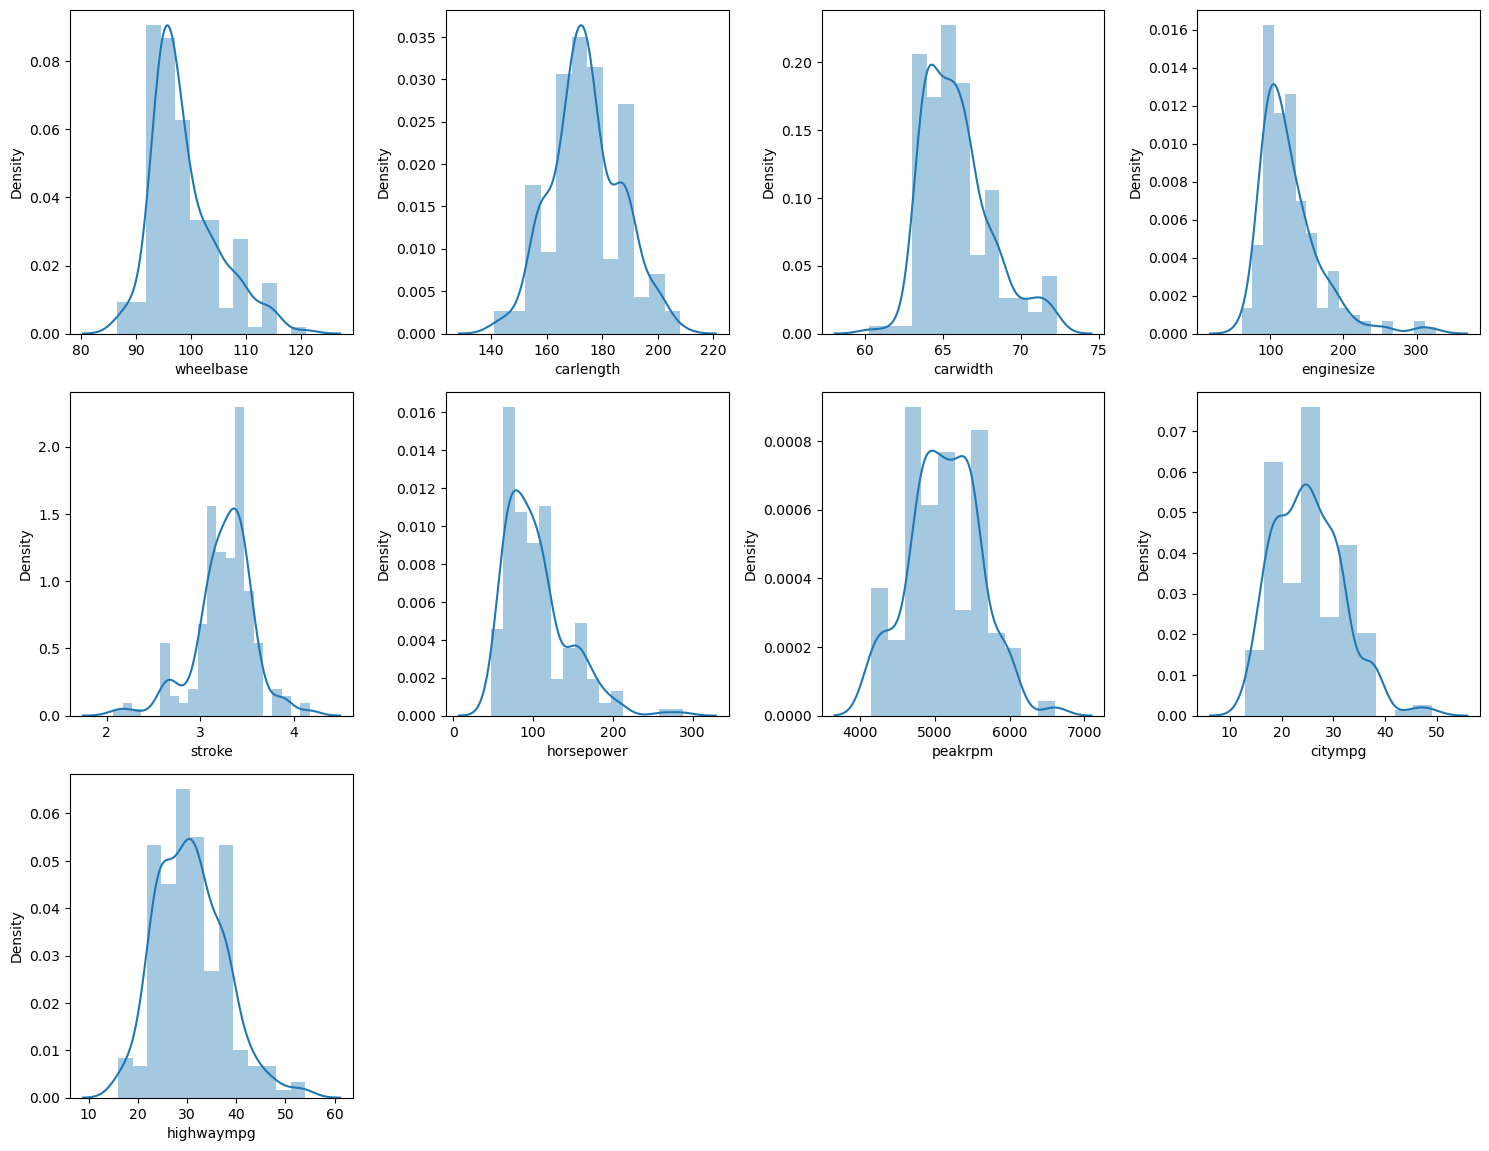

In [169]:
#SUBPLOT
plt.figure(figsize=(15,15))
plotnumber = 1

for i in df:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [171]:
# for enginesize we can apply log transformation
data['enginesize'] = np.log(data['enginesize'] + 1)

# Adding +1 ensures numerical stability by avoiding undefined logarithmic values and 
# allowing the transformation to be applied smoothly, even when enginesize has zeros or very small values.

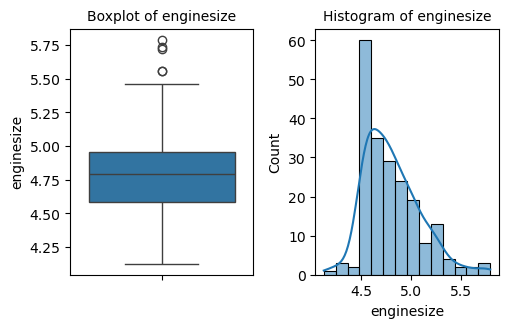

In [41]:

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plotnumber = 1

for i in ['enginesize']:
    # Boxplot
    ax = plt.subplot(2, 4, plotnumber)
    sns.boxplot(y=data[i], ax=ax)
    plt.title(f'Boxplot of {i}', fontsize=10)
    
    plotnumber += 1

    # Histogram with KDE
    ax = plt.subplot(2, 4, plotnumber)
    sns.histplot(x=data[i], kde=True, ax=ax)  # `histplot` is recommended in newer versions of seaborn
    plt.title(f'Histogram of {i}', fontsize=10)
    
    plotnumber += 1

plt.tight_layout()
plt.show()

In [164]:
# we can retrain the transformation

In [210]:
df1 = data[['carwidth','stroke','horsepower']]

In [212]:
#we'll handle by IQR
Q1=df.quantile(0.25)

Q3=df.quantile(0.75)

IQR = Q3-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [214]:
for i in df1:
  data.loc[data[i]<lower_limit[i],i]=data[i].median()

In [216]:
for i in df1:
  data.loc[data[i]<lower_limit[i],i]=data[i].median()

### Modelling 

In [218]:
# split the data into x and y 
x = data.drop(columns= 'price',axis=1)
y = data['price']

In [278]:
# split the data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.30, random_state = 3)

In [280]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns=x.columns)

In [282]:
### linear regression
# implement the model

# import the algo
from sklearn.linear_model import LinearRegression

# initializatin
model = LinearRegression()

# train the model
model.fit(x_train,y_train)


LinearRegression()

In [284]:
# getting predicction in test and train data
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [286]:
from sklearn.metrics import r2_score
print('Train score',r2_score(y_train,y_pred_train))
print('Test score',r2_score(y_test,y_pred))

Train score 0.8614545772444755
Test score 0.879330280411214


##### The performance of the model is 0.87

- There is a difference of almost 1% in the performance train and test data
- The model does overfits
- But has multicollinearity applying regularization might help
- Applying cross validation along with hyperparameter tuning might have the impact on  model performance

In [298]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_values = {'alpha': [0.01,0.02,0.03,0.1,0.2,0.3,0.23]}

# Initialize the Ridge regression model
ridge = Ridge()

# Perform Grid Search with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=ridge, param_grid=alpha_values, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(x_train, y_train)


# Predict on the train set and evaluate
y_pred_train = ridge_best.predict(x_train)
r2_square_train = r2_score(y_train,y_pred_train)
print(f"R-squared on train data: {r2_square_train}")

# Predict on the test set and evaluate
y_pred = ridge_best.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared on test set: {r2}")




Best alpha: 0.3
R-squared on train data: 0.8579484828584394
R-squared on test set: 0.8604771131364048


In [302]:
from sklearn.linear_model import LassoCV

# LassoCV automatically tunes alpha using cross-validation
lasso_cv = LassoCV(cv=5)  # Use 5-fold cross-validation
lasso_cv.fit(x_train, y_train)

# Get the best alpha
print("Best alpha:", lasso_cv.alpha_)


# Predict on the train set and evaluate
y_pred_train = lasso_cv.predict(x_train)
r2_square_train = r2_score(y_train,y_pred_train)
print(f"R-squared  train data: {r2_square_train}")

# Predict on the test set and evaluate
y_pred = lasso_cv.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared on test set: {r2}")





Best alpha: 40.94827837337708
R-squared  train data: 0.8455430197938305
R-squared on test set: 0.845740827459007


Conclusion

1. After applying ridge regularization the model perfromance on test data 0.86  and on train data is 0.85
2. The conclusion is the regularization i.e ridge is helping the model to learn better on data
